# Principal Component Analysis with Cancer Data

In [131]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pandas
import numpy as numpy
import os
import seaborn as sns
import matplotlib.pyplot as matplot
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
def EDA_Corr(df):
    corr = df.corr()
    index = corr.columns
    Output = []
    for i in range(0,len(index)):
        i = index[i]
        Pos = corr.index[(corr[i] >= 0.5)].tolist()
        No = corr.index[(corr[i] < 0.5) & (corr[i] > -0.6)].tolist()
        Neg = corr.index[(corr[i] <= -0.5)].tolist()
        leng_u = len(No)
        leng_pos = len(Pos)
        leng_neg = len(Neg)
        Out = [i, leng_u, leng_pos, leng_neg, Pos, Neg, No]
        Output.append(Out)
    fig, ax = matplot.subplots(figsize=(20,10))  
    sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='Blues', linewidths=0, ax = ax)
    Output1 = pandas.DataFrame(Output, columns= ['Feature','Uniqueness','Positive rel', 'inverse rel', 'Pos', 'Neg', 'No'])
    return Output1

def EDA(df):
    EDA = pandas.DataFrame((df.describe()).T)
    EDA["Kurtosis"] = df.kurtosis()
    EDA["Skewness"] = df.skew()
    EDA["Range"] = EDA['max'] -  EDA['min']
    EDA["IQR"] = EDA['75%'] -  EDA['25%']
    return EDA

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [3]:
Source = pandas.read_csv('breast-cancer-wisconsin.data.csv')
Source.head()

,Id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Id                             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
Source.shape

(699, 11)

In [7]:
del Source['Id']

In [8]:
Source_PCA = Source.iloc[:,0:9]

In [9]:
Source_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(8), object(1)
memory usage: 49.2+ KB


In [10]:
Source_PCA.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [54]:
EDA = EDA(Source_PCA)
EDA

,count,mean,std,min,25%,50%,75%,max,Kurtosis,Skewness,Range,IQR
Clump Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0,-0.623715,0.592859,9.0,4.0
Uniformity of Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0,0.098803,1.233137,9.0,4.0
Uniformity of Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0,0.007011,1.161859,9.0,4.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0,0.987947,1.524468,9.0,3.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0,2.169066,1.712172,9.0,2.0
Bare Nuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0,-0.726467,1.025347,9.0,4.0
Bland Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0,0.184621,1.099969,9.0,3.0
Normal Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0,0.474269,1.422261,9.0,3.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0,12.657878,3.560658,9.0,0.0


Convering all columns as category as its a rating scale of 1 to 10. Considering each rating to signify the intensity and hence treating it as a category

In [12]:
Source_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(8), object(1)
memory usage: 49.2+ KB


In [13]:
Source_PCA['Clump Thickness'].value_counts()

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump Thickness, dtype: int64

In [14]:
Source_PCA['Uniformity of Cell Shape'].value_counts()

1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: Uniformity of Cell Shape, dtype: int64

In [15]:
Source_PCA['Uniformity of Cell Size'].value_counts()

1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity of Cell Size, dtype: int64

In [16]:
Source_PCA['Marginal Adhesion'].value_counts()

1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal Adhesion, dtype: int64

In [17]:
Source_PCA['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [18]:
Source_PCA['Single Epithelial Cell Size'].value_counts()

2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single Epithelial Cell Size, dtype: int64

In [19]:
Source_PCA['Mitoses'].value_counts()

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [20]:
Source_PCA['Normal Nucleoli'].value_counts()

1     443
10     61
3      44
2      36
8      24
6      22
5      19
4      18
9      16
7      16
Name: Normal Nucleoli, dtype: int64

In [21]:
Source_PCA['Mitoses'].value_counts()

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [22]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [23]:
(Source_PCA['Bare Nuclei'] == '?').value_counts()

False    683
True      16
Name: Bare Nuclei, dtype: int64

imputing the missing values by mode as 1 occured 402 times out of 699

In [24]:
Source_PCA['Bare Nuclei'] = Source_PCA['Bare Nuclei'].replace('?',1 )

In [25]:
(Source_PCA['Bare Nuclei'] == '?').value_counts()

False    699
Name: Bare Nuclei, dtype: int64

In [37]:
Source_PCA['Bare Nuclei'] = Source_PCA['Bare Nuclei'].astype('int64')

In [38]:
Source_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(9)
memory usage: 49.2 KB


In [26]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [27]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [28]:
# Check for correlation of variable

,Feature,Uniqueness,Positive rel,inverse rel,Pos,Neg,No
0,Clump Thickness,2,7,0,"[Clump Thickness, Uniformity of Cell Size, Uni...",[],"[Marginal Adhesion, Mitoses]"
1,Uniformity of Cell Size,1,8,0,"[Clump Thickness, Uniformity of Cell Size, Uni...",[],[Mitoses]
2,Uniformity of Cell Shape,1,8,0,"[Clump Thickness, Uniformity of Cell Size, Uni...",[],[Mitoses]
3,Marginal Adhesion,2,7,0,"[Uniformity of Cell Size, Uniformity of Cell S...",[],"[Clump Thickness, Mitoses]"
4,Single Epithelial Cell Size,1,8,0,"[Clump Thickness, Uniformity of Cell Size, Uni...",[],[Mitoses]
5,Bare Nuclei,1,8,0,"[Clump Thickness, Uniformity of Cell Size, Uni...",[],[Mitoses]
6,Bland Chromatin,1,8,0,"[Clump Thickness, Uniformity of Cell Size, Uni...",[],[Mitoses]
7,Normal Nucleoli,1,8,0,"[Clump Thickness, Uniformity of Cell Size, Uni...",[],[Mitoses]
8,Mitoses,8,1,0,[Mitoses],[],"[Clump Thickness, Uniformity of Cell Size, Uni..."


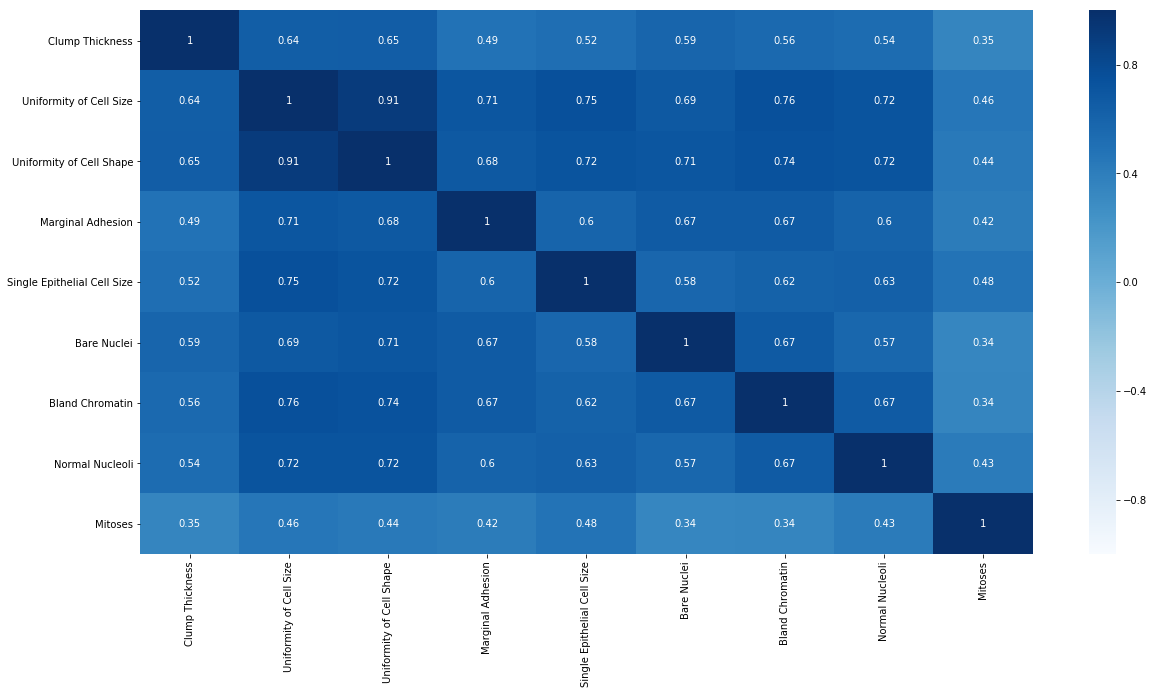

In [39]:
EDA_Corr(Source_PCA)

In [29]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [30]:
#Let us check for pair plots

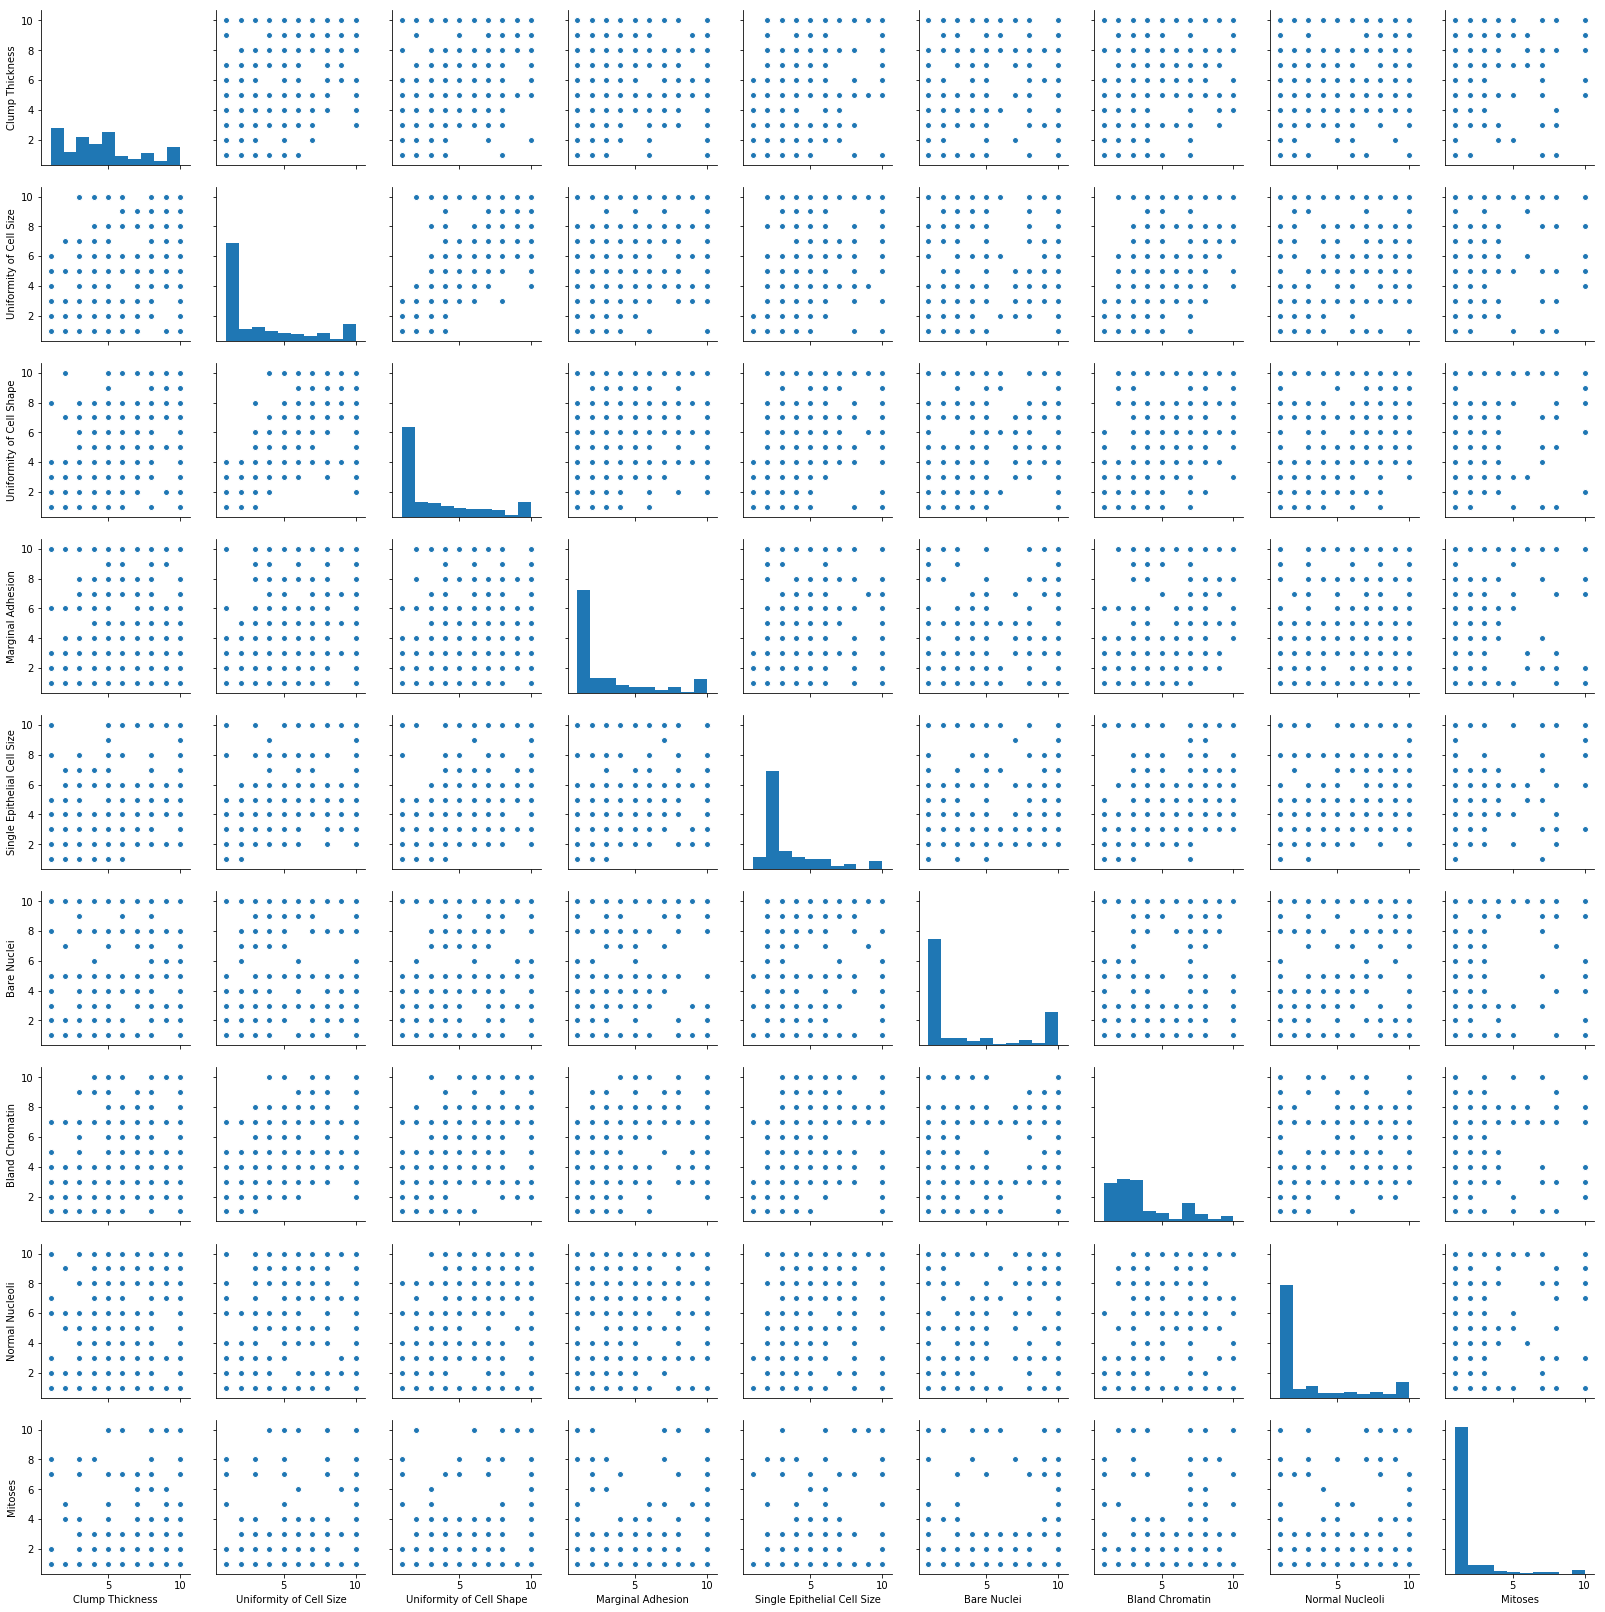

In [40]:
sns.pairplot(Source_PCA)

In [31]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [43]:
# We could see most of the outliers are now removed.
Source_PCA.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')

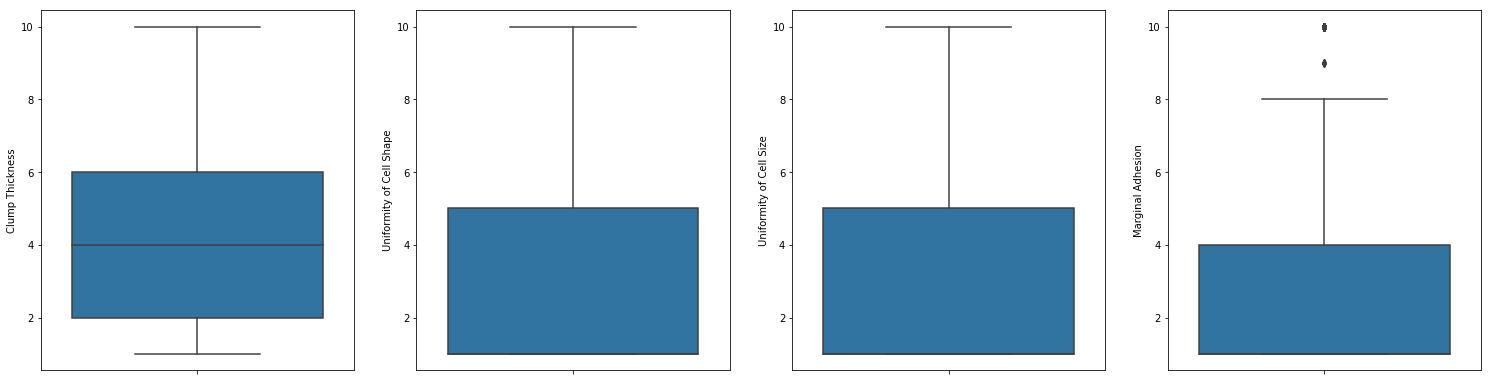

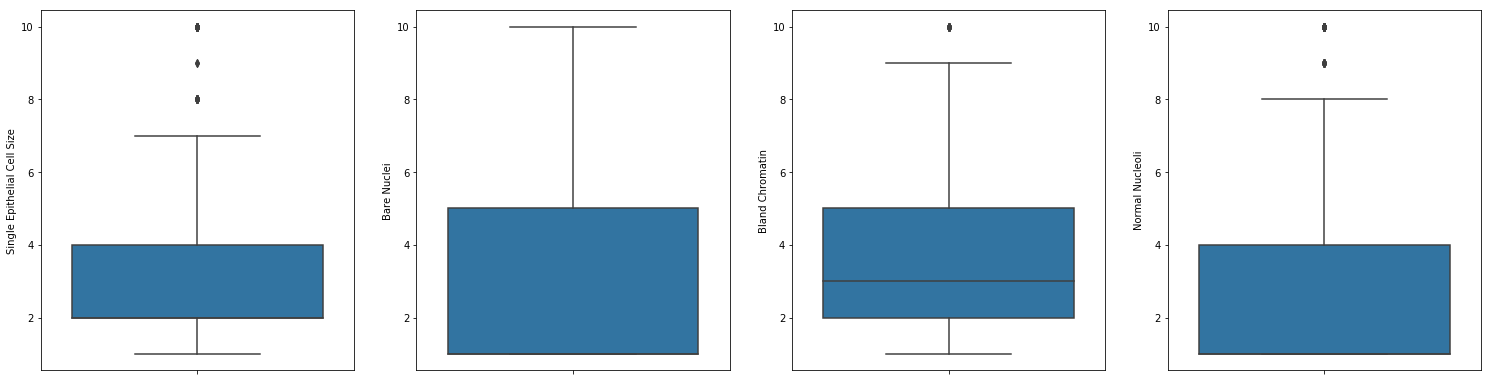

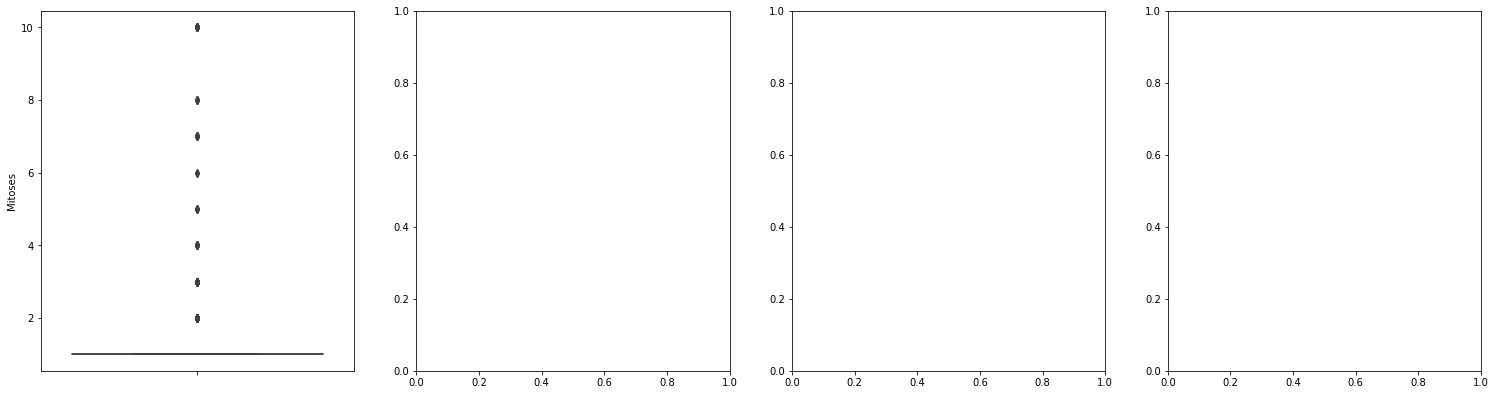

In [44]:
f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.boxplot(Source_PCA['Clump Thickness'], ax = axes[0], orient='v')
sns.boxplot(Source_PCA['Uniformity of Cell Shape'], ax = axes[1], orient='v')
sns.boxplot(Source_PCA['Uniformity of Cell Size'], ax = axes[2], orient='v')
sns.boxplot(Source_PCA['Marginal Adhesion'], ax = axes[3], orient='v')
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.boxplot(Source_PCA['Single Epithelial Cell Size'], ax = axes[0], orient='v')
sns.boxplot(Source_PCA['Bare Nuclei'], ax = axes[1], orient='v')
sns.boxplot(Source_PCA['Bland Chromatin'], ax = axes[2], orient='v')
sns.boxplot(Source_PCA['Normal Nucleoli'], ax = axes[3], orient='v')
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

f, axes = matplot.subplots(1, 4, figsize=(10, 10))
sns.boxplot(Source_PCA['Mitoses'], ax = axes[0], orient='v')
matplot.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

In [68]:
Subset = Source_PCA[['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']]

Subset_Columns = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']

In [65]:
a = Subset > Subset.quantile(0.75) + (1.5 * EDA['IQR'])
b = Subset < Subset.quantile(0.25) - (1.5 * EDA['IQR'])
Source_PCA[["Q31","Q32","Q33","Q34","Q35","Q36","Q37","Q38","Q39"]] = a
Source_PCA[["Q11","Q12","Q13","Q14","Q15","Q16","Q17","Q18","Q19"]] = b

columns = ['Q31', 'Q32', 'Q33', 'Q34', 'Q35',
       'Q36', 'Q37', 'Q38', 'Q39', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19']

Q1 =  ['Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19']

Q3 =  ['Q31', 'Q32', 'Q33', 'Q34', 'Q35',
       'Q36', 'Q37', 'Q38', 'Q39']

In [69]:
Q1_Outliers = []
Q1_j = []
Q3_Outliers = []
Q3_j = []
for i in range(0,len(Q1)):
    i = Q1[i]
    No = Source_PCA.shape[0] - Source_PCA[i].value_counts()[0]
    Q1_Outliers.append(No)
    Q1_j.append(i)
Q1_Col = pandas.DataFrame(Q1_j, columns=["Q1"])
Q1_outliers = pandas.DataFrame(Q1_Outliers, columns=["Q1 Outliers"])
Outliers_impact_Q1 = Q1_Col.join(Q1_outliers)

for i in range(0,len(Q3)):
    i = Q3[i]
    No = Source_PCA.shape[0] - Source_PCA[i].value_counts()[0]
    Q3_Outliers.append(No)
    Q3_j.append(i)
Q3_Col = pandas.DataFrame(Q3_j, columns=["Q3"])
Q3_outliers = pandas.DataFrame(Q3_Outliers, columns=["Q3 Outliers"])
Outliers_impact_Q3 = Q3_Col.join(Q3_outliers)

Outliers_impact = Outliers_impact_Q1['Q1 Outliers']+Outliers_impact_Q3['Q3 Outliers']
Outliers_impact = (pandas.DataFrame(Subset_Columns, columns=["Column Name"])).join(pandas.DataFrame(Outliers_impact, columns=["No of Outliers"]))

In [70]:
Outliers_impact

,Column Name,No of Outliers
0,Clump Thickness,0
1,Uniformity of Cell Size,0
2,Uniformity of Cell Shape,0
3,Marginal Adhesion,60
4,Single Epithelial Cell Size,54
5,Bare Nuclei,0
6,Bland Chromatin,20
7,Normal Nucleoli,77
8,Mitoses,120


In [72]:
aij = []
for i in range(0,9):
    i = Q3[i]
    bij = ((pandas.DataFrame(Source[i])).index[(Source[i] == True)].tolist())
    aij = aij + bij
Q3_indices = (pandas.Series(aij)).value_counts()


cij = []
for i in range(0,9):
    i = Q1[i]
    dij = ((pandas.DataFrame(Source[i])).index[(Source[i] == True)].tolist())
    cij = cij + dij
Q1_indices = (pandas.Series(cij)).value_counts()

In [73]:
Q3_indices

173    5
648    5
482    5
680    4
191    4
425    4
286    4
285    4
366    4
360    4
612    4
358    3
99     3
302    3
210    3
353    3
132    3
367    3
177    3
166    3
213    3
98     3
104    3
205    3
514    3
100    3
264    3
608    3
85     3
84     3
      ..
254    1
317    1
323    1
110    1
142    1
689    1
239    1
626    1
359    1
633    1
123    1
356    1
126    1
128    1
129    1
348    1
657    1
18     1
658    1
148    1
334    1
151    1
152    1
666    1
331    1
669    1
328    1
160    1
74     1
698    1
Length: 195, dtype: int64

In [74]:
Q1_indices

Series([], dtype: int64)

In [75]:
Source_PCA = (Source_PCA.drop([173,648,482,680,191,425,286,285,366,360,612]))


In [77]:
No_of_records_removed = (699-len(Source_PCA))
print(No_of_records_removed, ",  % of data removed = ", round((No_of_records_removed/195)*100,2))

11 ,  % of data removed =  5.64


In [78]:
Source_PCA.shape

(688, 27)

In [107]:
Q3_values = Subset.quantile(0.75) + (1.5 * EDA['IQR'])
Q1_values = Subset.quantile(0.25) - (1.5 * EDA['IQR'])
Outliers_Q3_Q1 = pandas.DataFrame(Q3_values, columns = ['Q3_values']).join(pandas.DataFrame(Q1_values, columns=['Q1_values']))
for i in range(0,len(Subset_Columns)):
    Q3 = ((Outliers_Q3_Q1).T)[Subset_Columns[i]].loc['Q3_values']
    Q1 = ((Outliers_Q3_Q1).T)[Subset_Columns[i]].loc['Q1_values']
    Source_PCA.loc[Source_PCA[Subset_Columns[i]] > Q3, Subset_Columns[i]] = numpy.nan
    Source_PCA.loc[Source_PCA[Subset_Columns[i]] < Q1, Subset_Columns[i]] = numpy.nan
    median1 = ((Source_PCA.loc[(Source_PCA[Subset_Columns[i]]<((((Outliers_Q3_Q1).T)[Subset_Columns[i]])['Q3_values'])) & 
             (Source_PCA[Subset_Columns[i]]>((((Outliers_Q3_Q1).T)[Subset_Columns[i]])['Q1_values']))])[Subset_Columns[i]]).median()
    Source_PCA.replace(numpy.nan,median1,inplace= True)

In [109]:
Source_PCA = Source_PCA.iloc[:,0:8]

In [111]:
Source_PCA.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0


# Q6 Create a covariance matrix for identifying Principal components

In [113]:
# PCA
# Step 1 - Create covariance matrix
X = Source_PCA.iloc[:,0:4].values
y = Source['Class'].values

In [118]:
X_Scaled = StandardScaler().fit_transform(X)

In [122]:
cov_matrix = numpy.cov(X_Scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

e_vals, e_vecs = numpy.linalg.eig(cov_matrix)
e_vals, e_vecs = numpy.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[1.0014556  0.63915672 0.64969057 0.39801281]
 [0.63915672 1.0014556  0.90242295 0.55383886]
 [0.64969057 0.90242295 1.0014556  0.52462878]
 [0.39801281 0.55383886 0.52462878 1.0014556 ]]
Eigenvectors 
[[ 0.46958807  0.46207963  0.7520976  -0.01785087]
 [ 0.55102679  0.10364321 -0.42459489 -0.71087745]
 [ 0.54839575  0.16095943 -0.42462813  0.70217171]
 [ 0.41847178 -0.86592873  0.27158667  0.03590944]]

Eigenvalues 
[2.86486994 0.62525929 0.41753591 0.09815727]


# Q7 Identify eigen values and eigen vector

In [34]:
# Step 2- Get eigen values and eigen vector

In [ ]:
Answered above

# Q8 Find variance and cumulative variance by each eigen vector

In [124]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = numpy.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 71.51764708  87.12640915  97.54963491 100.        ]


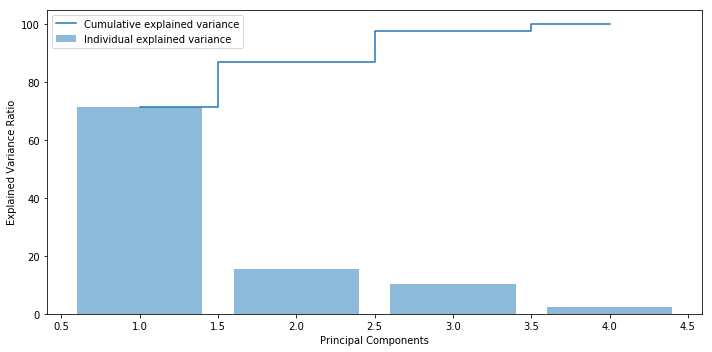

In [125]:
matplot.figure(figsize=(10 , 5))
matplot.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
matplot.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
matplot.ylabel('Explained Variance Ratio')
matplot.xlabel('Principal Components')
matplot.legend(loc = 'best')
matplot.tight_layout()
matplot.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [127]:
eigen_pairs = [(numpy.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(2.864869938463906, array([0.46958807, 0.55102679, 0.54839575, 0.41847178])),
 (0.6252592898686063,
  array([ 0.46207963,  0.10364321,  0.16095943, -0.86592873])),
 (0.4175359139363861,
  array([ 0.7520976 , -0.42459489, -0.42462813,  0.27158667])),
 (0.09815727403386415,
  array([-0.01785087, -0.71087745,  0.70217171,  0.03590944]))]

In [129]:
w = numpy.hstack((eigen_pairs[0][1].reshape(4,1), 
                      eigen_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', w)
X_sd_pca = X_Scaled.dot(w)

Matrix W:
 [[ 0.46958807  0.46207963]
 [ 0.55102679  0.10364321]
 [ 0.54839575  0.16095943]
 [ 0.41847178 -0.86592873]]


In [130]:
X_Scaled.shape, w.shape, X_sd_pca.shape

((688, 4), (4, 2), (688, 2))

In [135]:
pca = PCA()
principalComponents = pca.fit_transform(X)
principalDf = pandas.DataFrame(data = principalComponents, columns = ['PC1','PC2','PC3','PC4'])

In [137]:
principalDf.head()

,PC1,PC2,PC3,PC4
0,-2.400270,2.065601,0.027922,0.162861
1,2.147180,-0.705633,2.381966,-0.152472
2,-3.373202,0.327379,-0.145000,0.117174
3,6.376686,-1.378399,-3.149852,0.087645
4,-2.389545,0.735111,1.817962,0.003364


# Q10 Find correlation between components and features

In [139]:
pca.score

<bound method PCA.score of PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>

In [141]:
pca.singular_values_

array([122.08121188,  49.47264134,  39.50282783,  23.87697074])

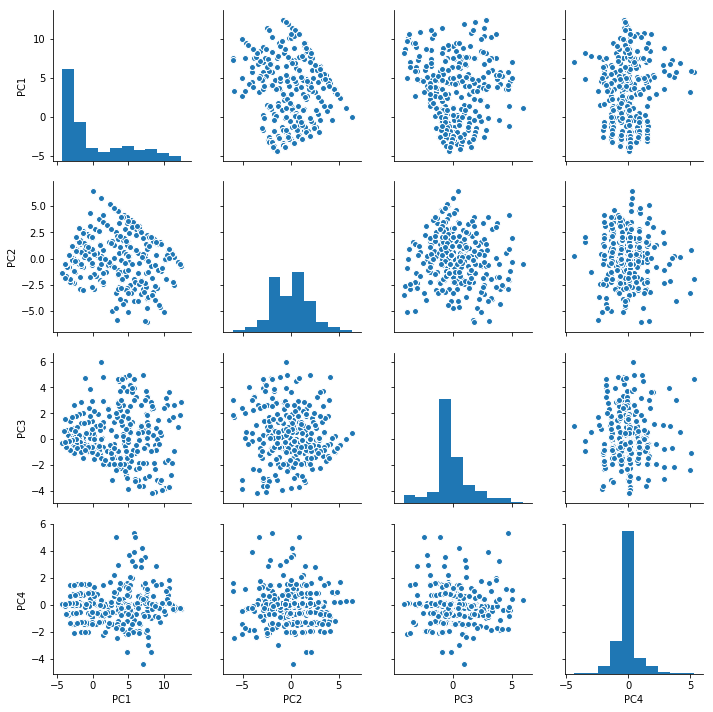

In [142]:
sns.pairplot(principalDf)

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

# Q22 Change the column indices from 0 to 99

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.